**Problem Statement**

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

**Problem Objective**


*   Using the data, come up with useful insights that can be used by each of the stores to improve in various areas.
*   Forecast the sales for each store for the next 12 weeks.





**Data Description**

This is the historical training data, which covers to 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

---



Store — the store number

---


Date — the week

---


Temperature — average temperature in the region

---


Fuel_Price — cost of fuel in the region

---


CPI — the consumer price index

---


Unemployment — the unemployment rate

---


IsHoliday — whether the week is a special holiday week

---



In [ ]:
''' Importing Required Libraries'''''

import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()



import warnings
warnings.filterwarnings('ignore')
import codecs



from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import dataset
data=pd.read_csv("/content/drive/MyDrive/datasets/Walmart DataSet.csv")

## Data Preprocessing

In [ ]:
df = data.copy()

In [ ]:
df.shape

(6435, 8)

**Data Shape**

1.  No. of rows = 6435
2.  No. of columns = 8



In [ ]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

 **Given data is data of 45 different stores**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Splitting Date Column:**
Using the Date column, three more columns are created Year, Month, Week

In [ ]:
# Now converting "Date"  to date time
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')
# Extract day, month, and year separately
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year


In [ ]:
#add a 'week' column to the dataset for further analysis
df['Week'] = df.Date.dt.isocalendar().week

In [ ]:
#import calendar

#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Day  Month  Year  Week  
0  211.096358         8.106    5      2  2010     5  
1  211.242170         8.106   12      2  2010     6  
2  211.289143         8.106   19      2  2010     7  
3  211.319643         8.106   26      2  2010     8  
4  211.350143         8.106    5      3  2010     9

In [ ]:
#get all columns
col = df.columns

In [ ]:
#Get count of unique values in each column
for col_name in col:
  print('No of unique values in', col_name, 'are', df[col_name].nunique())

No of unique values in Store are 45
No of unique values in Date are 143
No of unique values in Weekly_Sales are 6435
No of unique values in Holiday_Flag are 2
No of unique values in Temperature are 3528
No of unique values in Fuel_Price are 892
No of unique values in CPI are 2145
No of unique values in Unemployment are 349
No of unique values in Day are 31
No of unique values in Month are 12
No of unique values in Year are 3
No of unique values in Week are 52


In [ ]:
#Check for missing values
for col_name in col:
  print('No of missing values in', col_name, 'are', df[col_name].isnull().sum())

No of missing values in Store are 0
No of missing values in Date are 0
No of missing values in Weekly_Sales are 0
No of missing values in Holiday_Flag are 0
No of missing values in Temperature are 0
No of missing values in Fuel_Price are 0
No of missing values in CPI are 0
No of missing values in Unemployment are 0
No of missing values in Day are 0
No of missing values in Month are 0
No of missing values in Year are 0
No of missing values in Week are 0


**Conclusion**

1.   There are total 45 stores
2.   Data covers 143 weeks from 5 Feb 2010 to 11 Jan 2012
3.   Data does not contain any missing values























In [ ]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Day  Month  Year  Week  
0  211.096358         8.106    5      2  2010     5  
1  211.242170         8.106   12      2  2010     6  
2  211.289143         8.106   19      2  2010     7  
3  211.319643         8.106   26      2  2010     8  
4  211.350143         8.106    5      3  2010     9

In [ ]:
#Extract some statistical properties of data
df.describe().T.style.bar(subset=['mean'], color='#205ff2')

From the data description average sale is 1046964.877562.

# **Univariate Analysis**

**Weekly Sales**

In [ ]:
df_weeks = df.groupby('Week').sum()

import plotly.express as px
fig = px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='deeppink', line_width=3)

It has been observed that weekly sales were high in last weeks of December, which is usually a Christmas holidays period.

In [ ]:
# From the Describe function we see that weekly sales for each store are very high.
# we will scale down the value for ease of use and revert back when we look residuals or where necessary


#df["Weekly_Sales"]=df.Weekly_Sales/1000



In [ ]:
def univariate_analysis(data, column_name):
    # Extract the column
    column = data[column_name]

    # Calculate descriptive statistics
    minimum = column.min()
    maximum = column.max()
    data_range = maximum - minimum
    mean = column.mean()
    median = column.median()
    mode = column.mode().iloc[0]
    skewness = column.skew()
    kurt = column.kurtosis()

    # Create a density plot
    plt.figure(figsize=(10, 6))
    sns.histplot(column, kde=True)
    plt.title(f'Univariate Analysis of {column_name}')
    plt.xlabel(f'{column_name} - Min: {minimum}, Max: {maximum}, Range: {data_range}\nMean: {mean}, Median: {median}, Mode: {mode}\nSkewness: {skewness}, Kurtosis: {kurt}')
    plt.show()

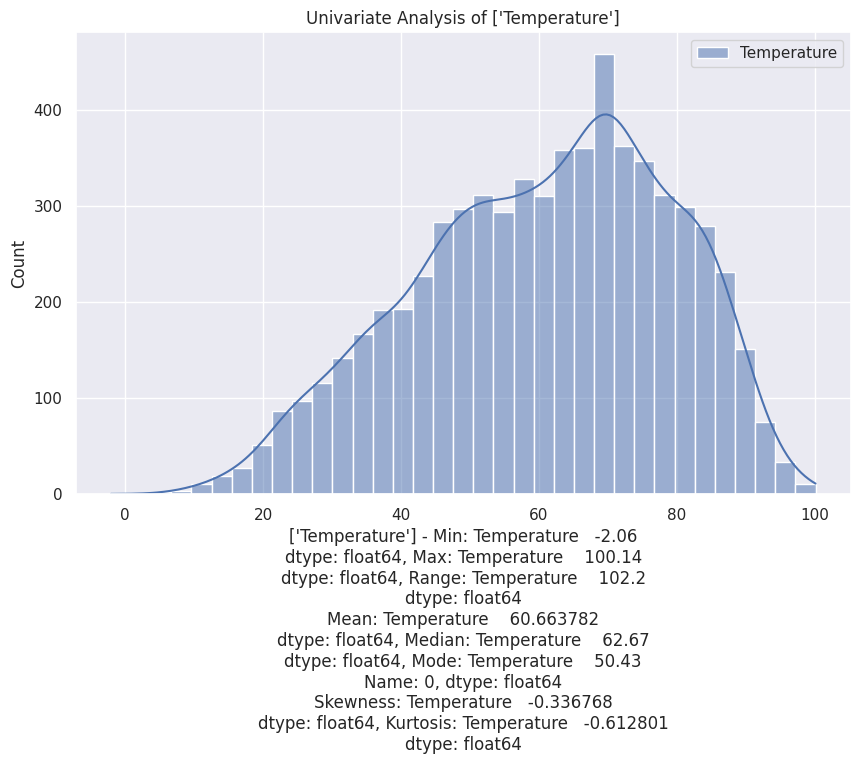

In [ ]:
 univariate_analysis(df, ['Temperature'])

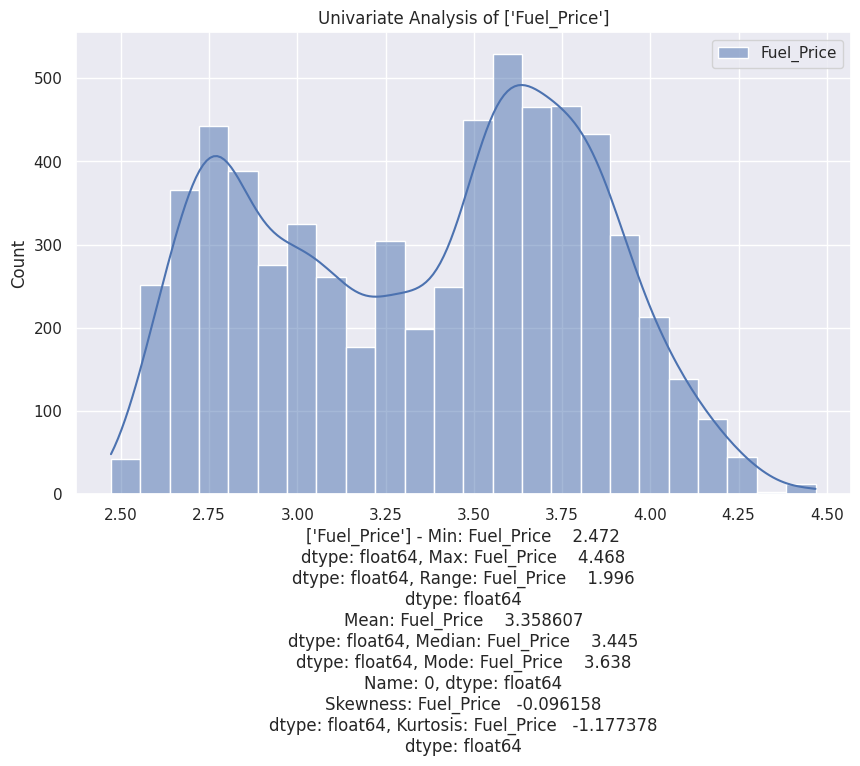

In [ ]:
 univariate_analysis(df, ['Fuel_Price'])

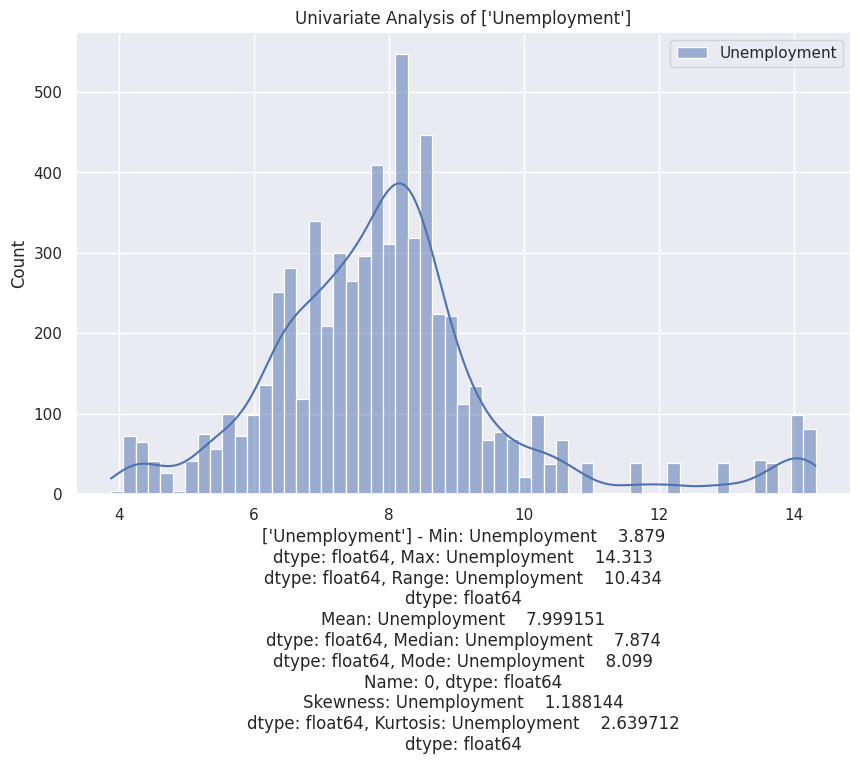

In [ ]:
 univariate_analysis(df, ['Unemployment'])

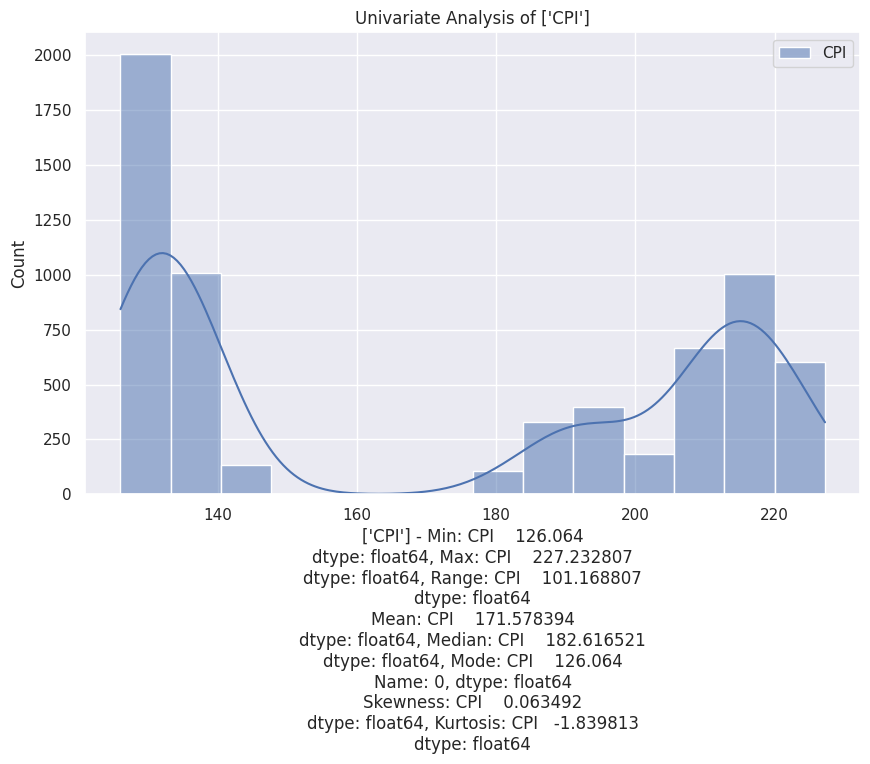

In [ ]:
 univariate_analysis(df, ['CPI'])

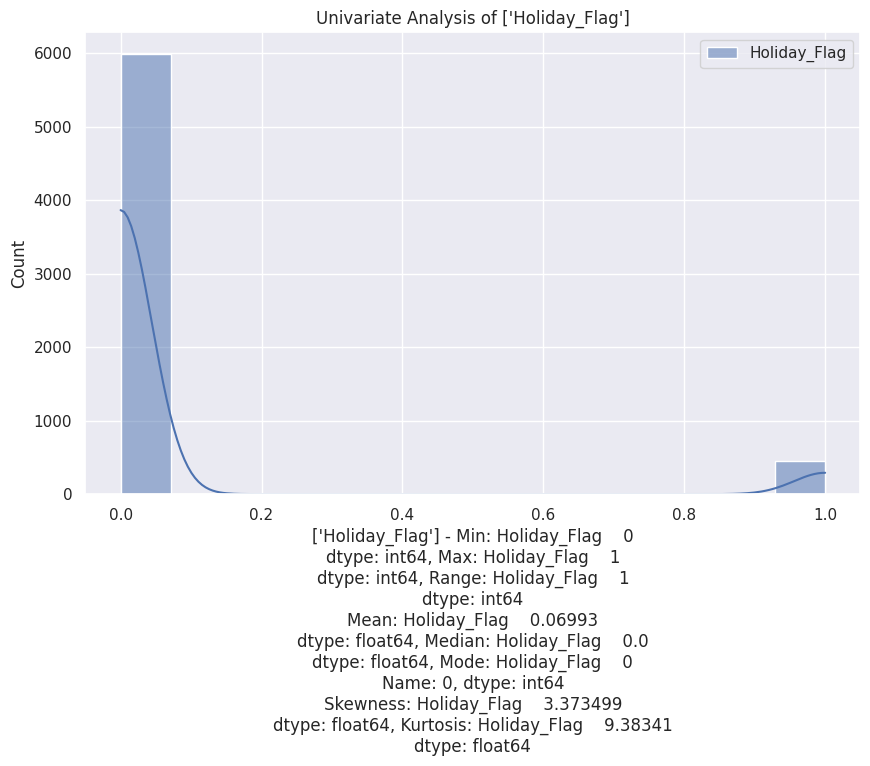

In [ ]:
 univariate_analysis(df, ['Holiday_Flag'])

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(df[column] , df['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

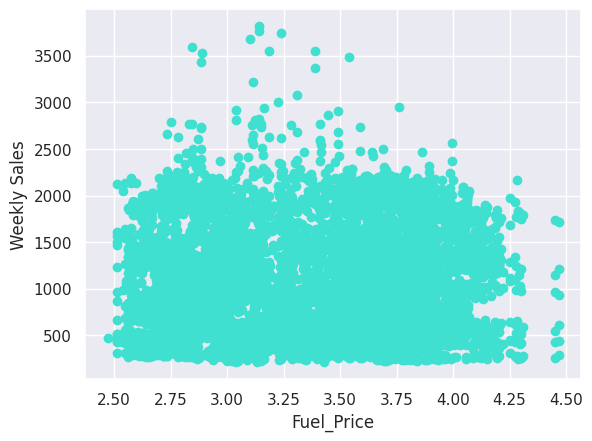

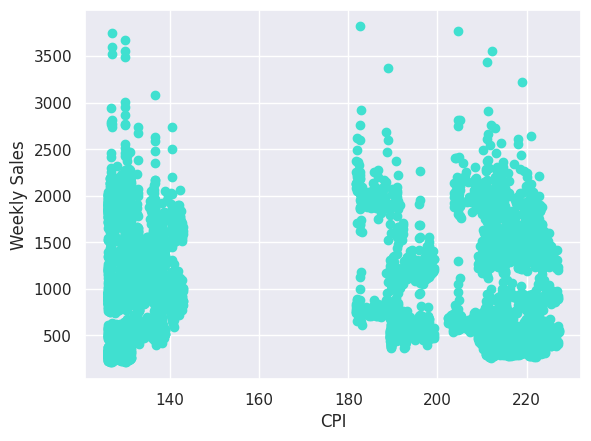

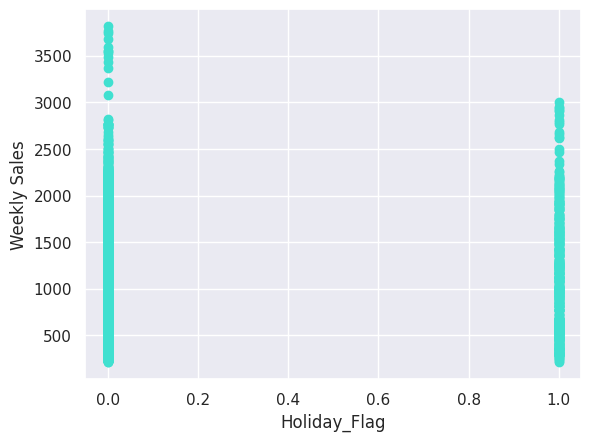

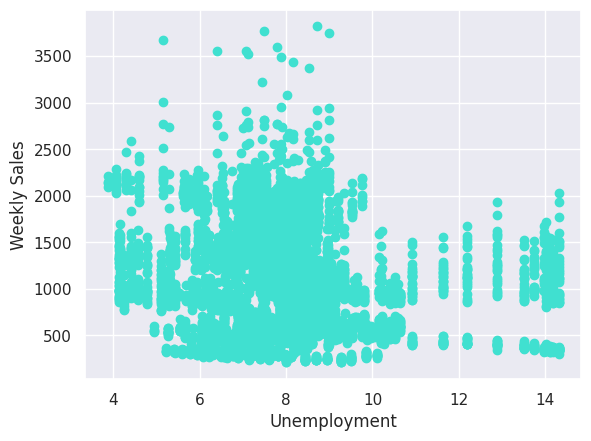

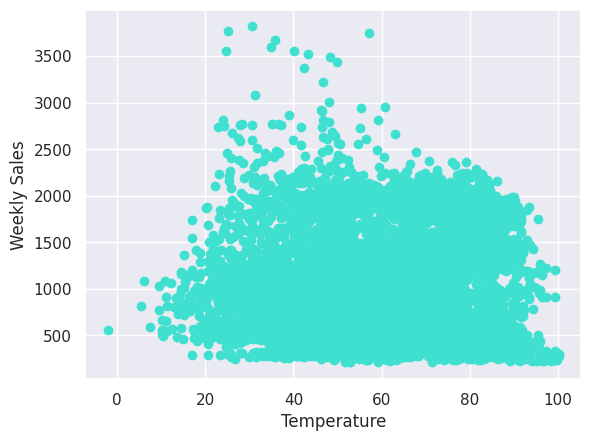

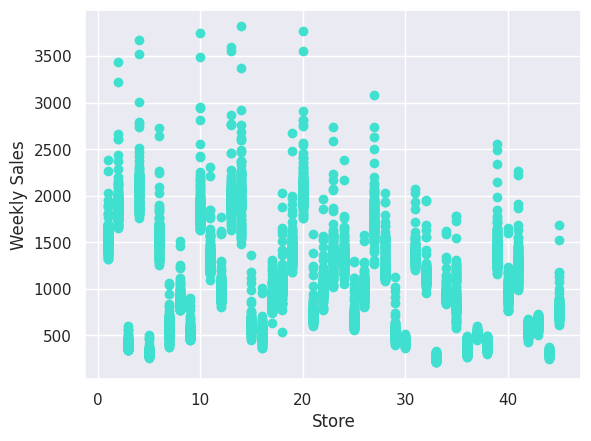

In [ ]:
scatter(df, 'Fuel_Price')
scatter(df, 'CPI')
scatter(df, 'Holiday_Flag')
scatter(df, 'Unemployment')
scatter(df, 'Temperature')
scatter(df, 'Store')


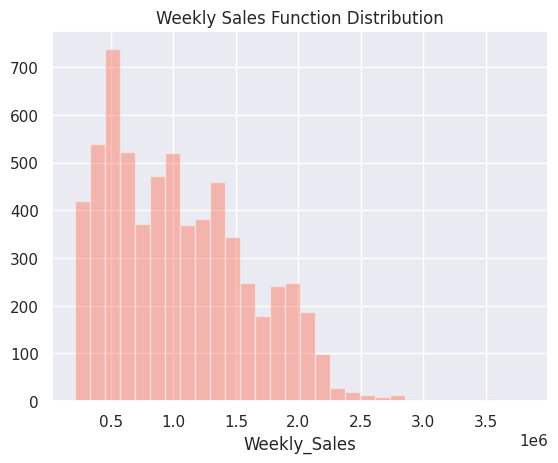

In [ ]:
# From the Describe function we see that weekly sales for each store are very high.
# we will scale down the value for ease of use and revert back when we look residuals or where necessary

sns.distplot(df.Weekly_Sales, kde=False, bins=30, color = 'tomato')
plt.title('Weekly Sales Function Distribution')
plt.show()

In [ ]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643.69090             0        42.31       2.572   
1      1 2010-02-12    1641.95744             1        38.51       2.548   
2      1 2010-02-19    1611.96817             0        39.93       2.514   
3      1 2010-02-26    1409.72759             0        46.63       2.561   
4      1 2010-03-05    1554.80668             0        46.50       2.625   

          CPI  Unemployment  Day  Month  Year  Week  
0  211.096358         8.106    5      2  2010     5  
1  211.242170         8.106   12      2  2010     6  
2  211.289143         8.106   19      2  2010     7  
3  211.319643         8.106   26      2  2010     8  
4  211.350143         8.106    5      3  2010     9

In [ ]:
weekly_sales_2010 = df[df.Year==2010]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2011 = df[df.Year==2011]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2012 = df[df.Year==2012]['Weekly_Sales'].groupby(df['Week']).mean()

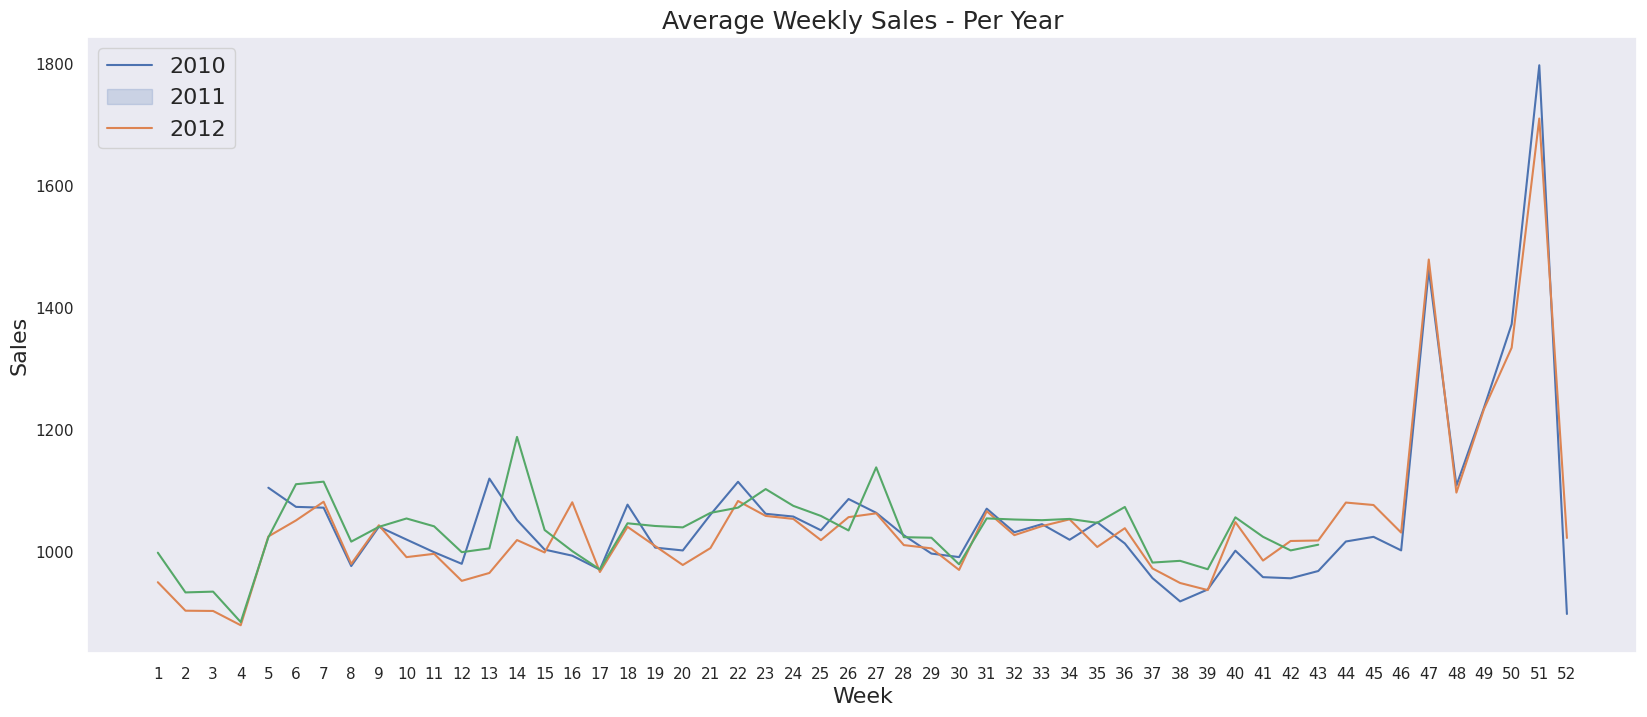

In [ ]:
plt.figure(figsize=(20, 8))

# Plot the average weekly sales for each year
sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)
sns.lineplot(x=weekly_sales_2011.index, y=weekly_sales_2011.values)
sns.lineplot(x=weekly_sales_2012.index, y=weekly_sales_2012.values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()


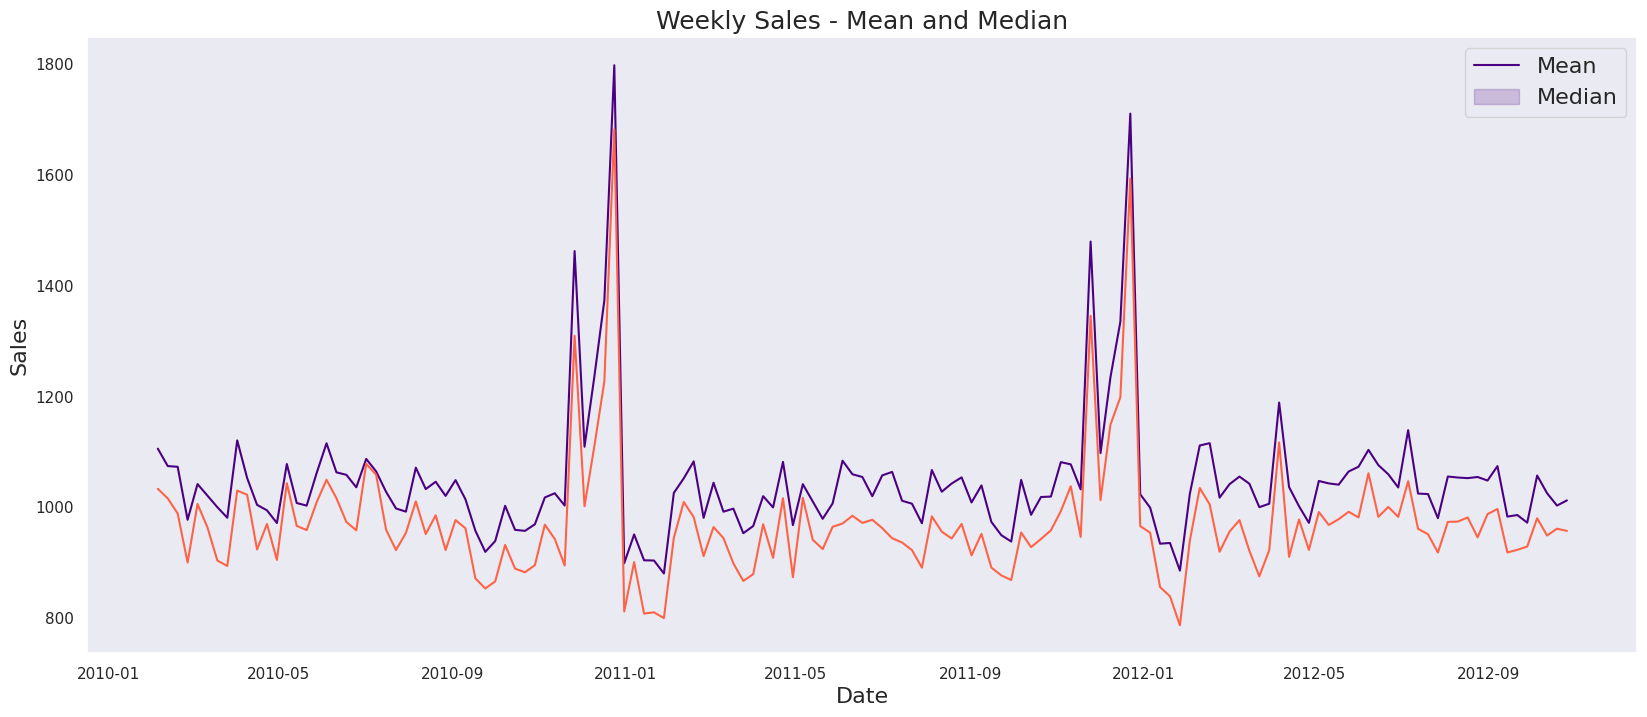

In [ ]:
weekly_sales_mean = df['Weekly_Sales'].groupby(df['Date']).mean()
weekly_sales_median = df['Weekly_Sales'].groupby(df['Date']).median()

plt.figure(figsize=(20,8))

# Plot mean and median weekly sales
sns.lineplot(x=weekly_sales_mean.index, y=weekly_sales_mean.values, color='indigo')
sns.lineplot(x=weekly_sales_median.index, y=weekly_sales_median.values, color='tomato')

plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

# **Bivariate Analysis**

In [ ]:
px.histogram(df, x='Temperature', y ='Weekly_Sales', color='Holiday_Flag', marginal='box')

In [ ]:
px.histogram(df, x='Fuel_Price', y ='Weekly_Sales', color='Holiday_Flag', marginal='box')

In [ ]:
px.histogram(data, x='CPI', y ='Weekly_Sales', color='Holiday_Flag')

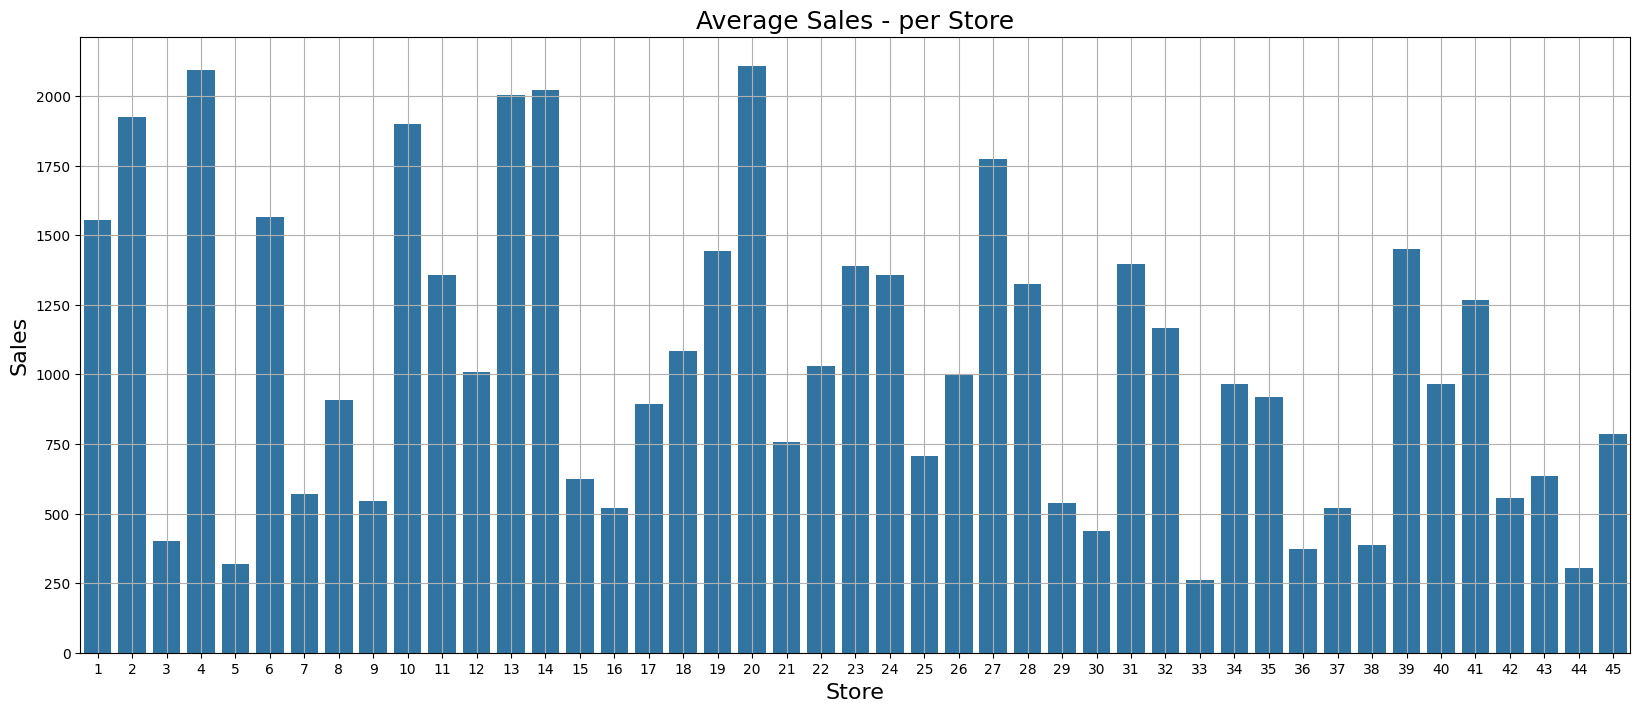

In [ ]:
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()

plt.figure(figsize=(20, 8))
plt.style.use('default')

# Plot barplot of average sales per store
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)

plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

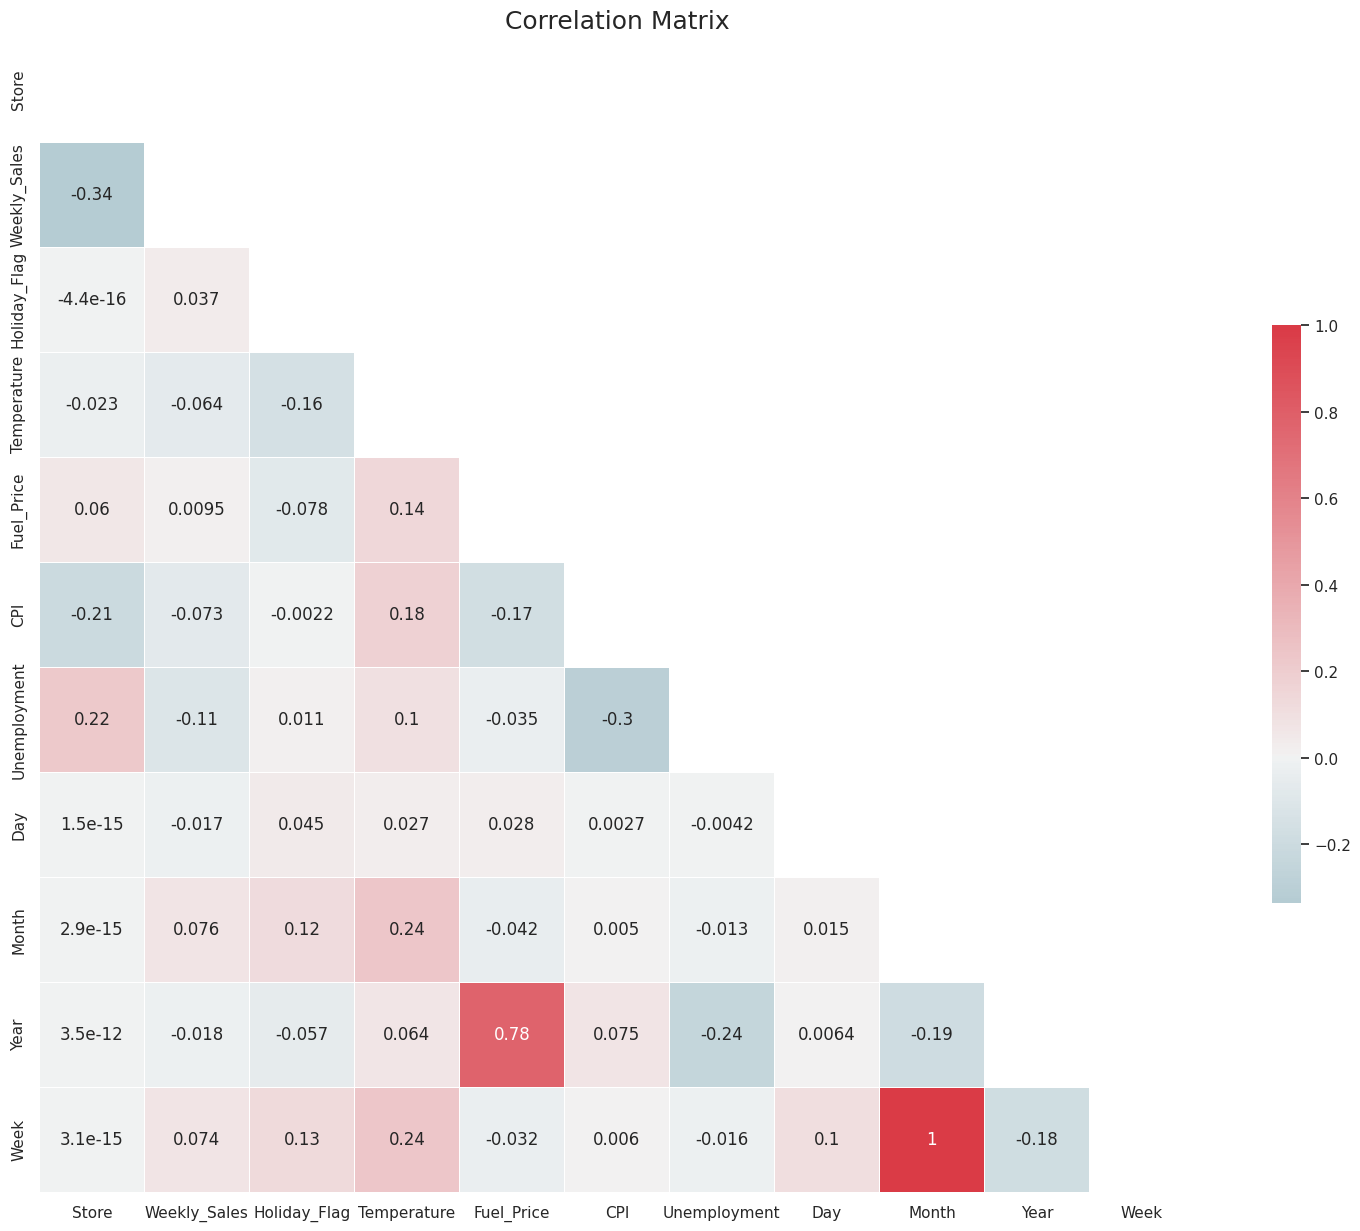

In [ ]:

sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.show()


**Monthly Sales for year**

In [ ]:

data_monthly = pd.crosstab(df["Year"], df["Month"], values=df["Weekly_Sales"],aggfunc='sum')
data_monthly


Month            1             2             3             4             5   \
Year                                                                          
2010            NaN  190332.98304  181919.80250  231412.36805  186710.93434   
2011   163703.96683  186331.32787  179356.44829  226526.51097  181648.15816   
2012   168894.47166  192063.57954  231509.65049  188920.90595  188766.47945   

Month            6             7             8             9             10  \
Year                                                                          
2010   192246.17236  232580.12598  187640.11089  177267.89637  217161.82402   
2011   189773.38519  229911.39887  188599.33225  220847.73842  183261.28315   
2012   240610.32929  187509.45240  236850.76568  180645.54447  184361.68042   

Month            11            12  
Year                               
2010   202853.37014  288760.53272  
2011   210162.35487  288078.10248  
2012            NaN           NaN

## Time Series


####Store 4

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
store4 =df[df['Store']==4]
# Grouped weekly sales by store 4
sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())

#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'], format='%d-%m-%Y')
# resetting date back to the index
sales4.set_index('Date',inplace = True)


In [ ]:
sales4.dtypes
sales4.head(20)

Weekly_Sales
Date                    
2010-02-05    2135.14387
2010-02-12    2188.30739
2010-02-19    2049.86026
2010-02-26    1925.72884
2010-03-05    1971.05744
2010-03-12    1894.32409
2010-03-19    1897.42936
2010-03-26    1762.53930
2010-04-02    1979.24712
2010-04-09    1818.45272
2010-04-16    1851.51969
2010-04-23    1802.67790
2010-04-30    1817.27328
2010-05-07    2000.62614
2010-05-14    1875.59728
2010-05-21    1903.75260
2010-05-28    1857.53370
2010-06-04    1903.29058
2010-06-11    1870.61923
2010-06-18    1929.73635

####Store 6

In [ ]:
store6 =df[df['Store']==6]
# Grouped weekly sales by store 6
sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'], format='%d-%m-%Y')
# resetting date back to the index
sales6.set_index('Date',inplace = True)

In [ ]:
sales6.head()

Weekly_Sales
Date                    
2010-02-05    1652.63510
2010-02-12    1606.28386
2010-02-19    1567.13807
2010-02-26    1432.95321
2010-03-05    1601.34882

#### Applying Time Series

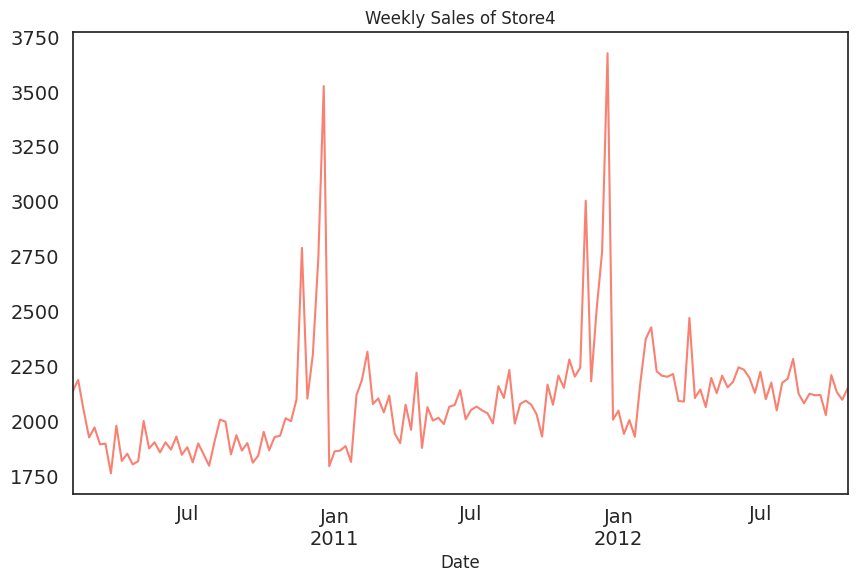

In [ ]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store4', fontsize=14, color = 'salmon')
plt.show()

As we can observe from the plot above, we have an slite increasing trend and  seasonality in our data.

We will use the statsmodels library from Python to perform a time series decomposition. The decomposition of time series is a statistical method to deconstruct time series into its trend, seasonal and residual components.
From graph we will use additive decomposition.

<Figure size 640x480 with 0 Axes>

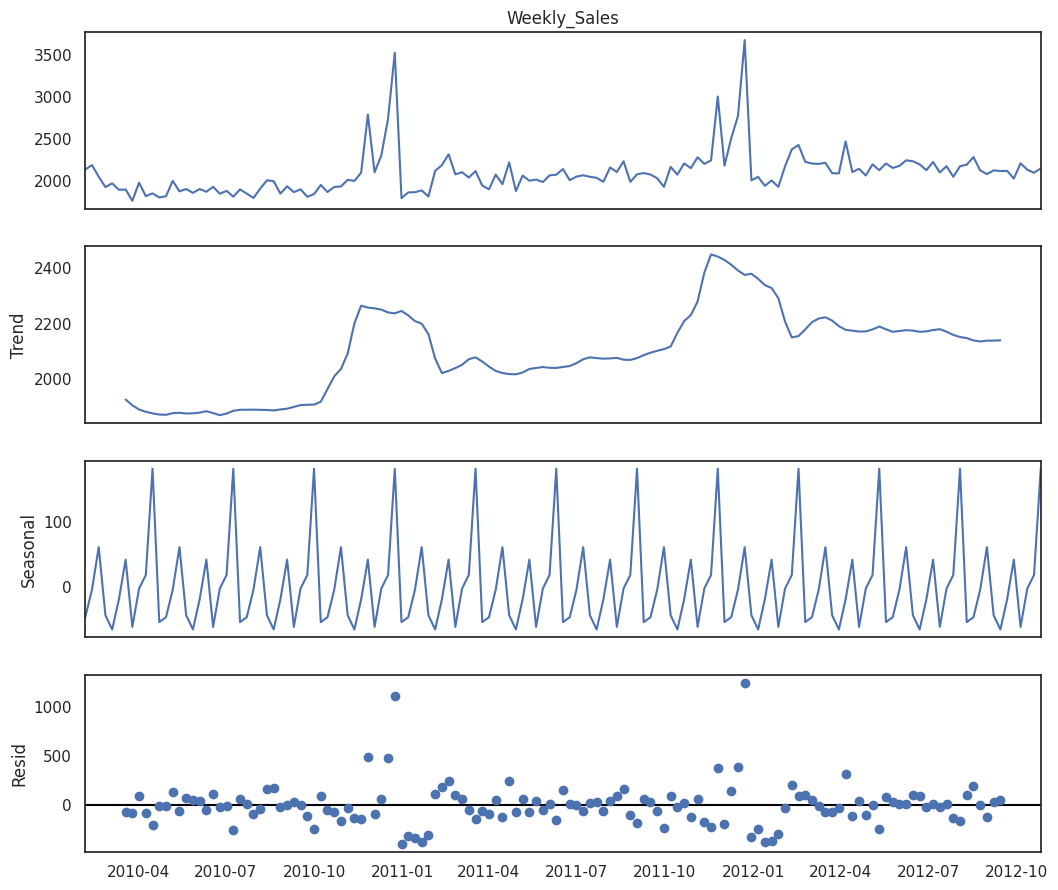

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [ ]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

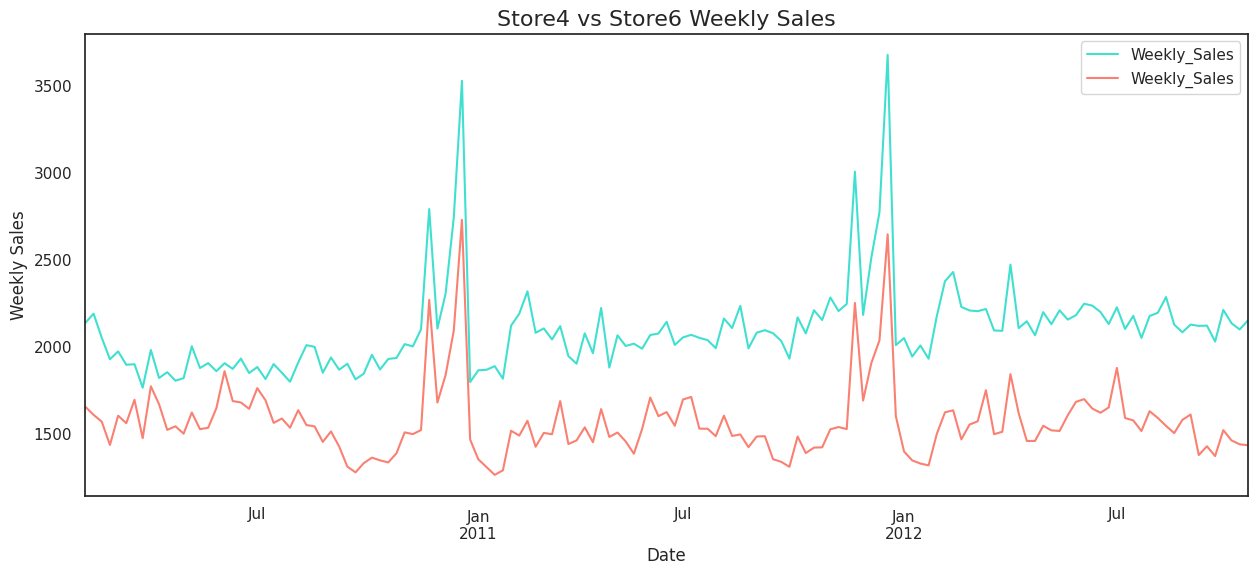

In [ ]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()

This shows an interesting trend during year ends (during both 2011 & 2012). The best thing is both the stores have almost the same trends and spike just the magnitude is different.



To check Stationarity:ACF and PACF plots

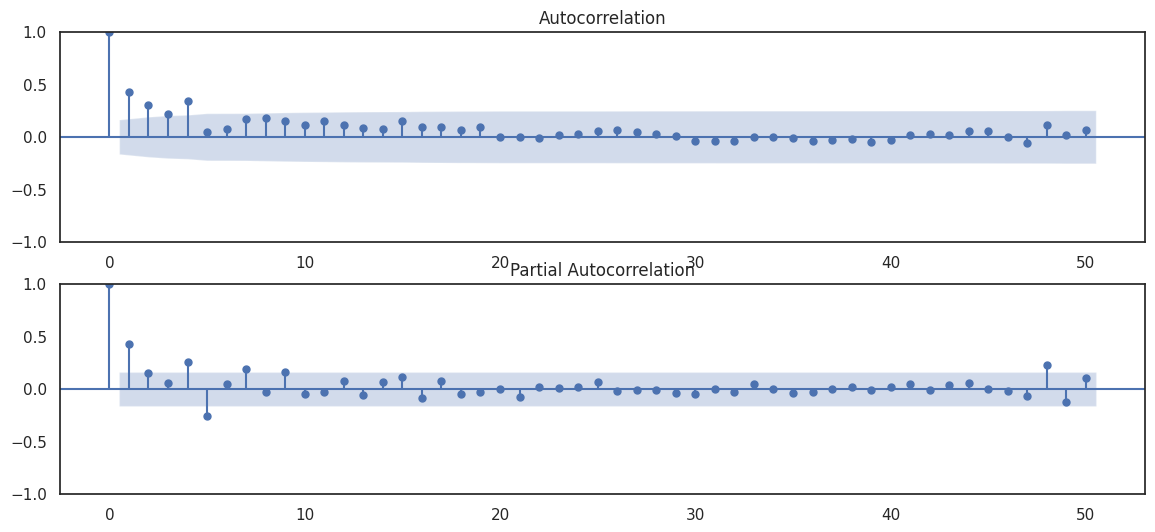

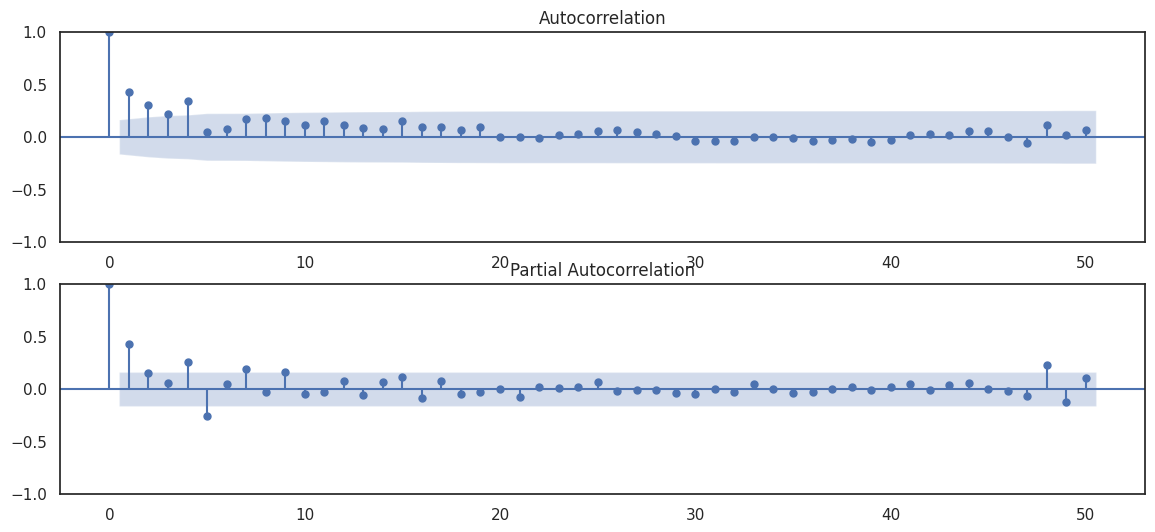

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
plot_acf(sales4, lags=50, ax=ax1)
plot_pacf(sales4, lags=50, ax=ax2)

ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags.

Augmented Dickey Fuller Test If the p-value is lower than the threshold value (5% or 1%), we reject the null hypothesis and time series is stationary. If the p-value is higher than the threshold, we fail to reject the null hypothesis and time series is non-stationary.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(sales4)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.879382
p-value                          0.047799
#Lags Used                       6.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


Here we fail to reject the null hypothesis and time series is non-stationary.

In [ ]:
sales4_diff = sales4.diff().diff(12)

In [ ]:
sales4_diff.dropna(inplace=True)

In [ ]:

print ('Results of Dickey-Fuller Test:')
sales4test = adfuller(sales4_diff)

dfoutput = pd.Series(sales4test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                  -4.913729
p-value                          0.000033
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


The test statistic is -4.913729. This is the Dickey-Fuller test statistic. In this case, it is more negative than the critical values at all significance levels. This indicates strong evidence against the null hypothesis of non-stationarity.

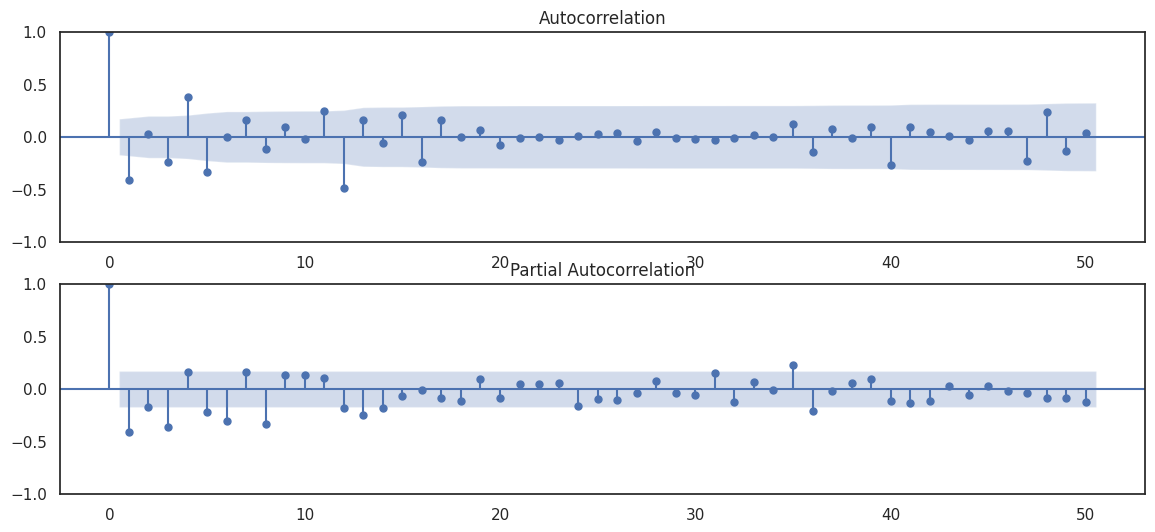

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(sales4_diff, lags=50, ax=ax1)
ax2 = plot_pacf(sales4_diff, lags=50, ax=ax2)
plt.savefig('acfpacf2')
plt.show()

In [ ]:
#pip install pmdarima

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(sales4, d=1, D=1,
                      #seasonal=True, m=52, trend='c',
                      #start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)

In [ ]:

#model.summary()

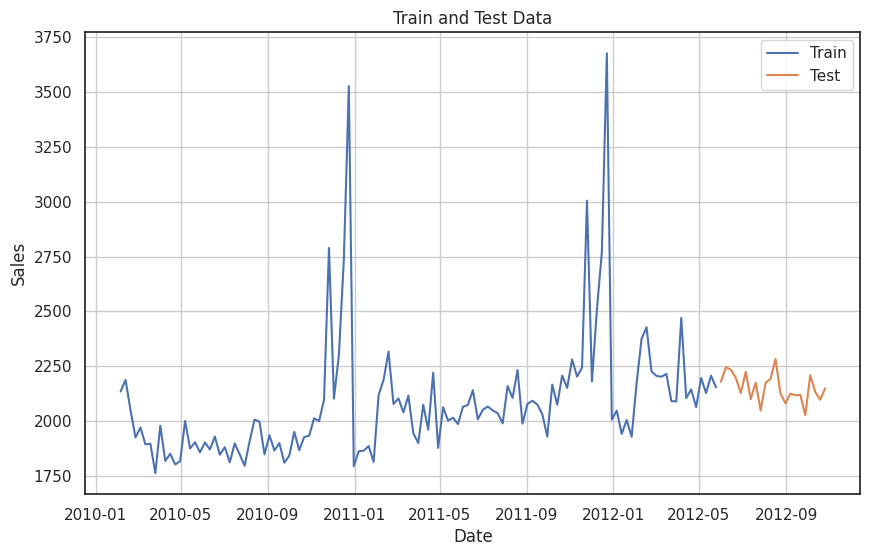

In [ ]:

# Divide into train and validation set
train = sales4[:int(0.85 * len(sales4))]
test = sales4[int(0.85 * len(sales4)):]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model = SARIMAX(train,order=(0,1,1),seasonal_order=(0,1,1,52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -400.443
Date:                            Wed, 13 Mar 2024   AIC                            806.887
Time:                                    09:54:48   BIC                            813.545
Sample:                                02-05-2010   HQIC                           809.525
                                     - 05-25-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9909      0.243     -4.080      0.000      -1.467      -0.515
ma.S.L52      -0.1711      0.123     -1.391      0.164      -0.412       0.070
sigma2      7115.0638   2017.894      3.526      0.000    3160.064    1.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                13.00
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.44
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

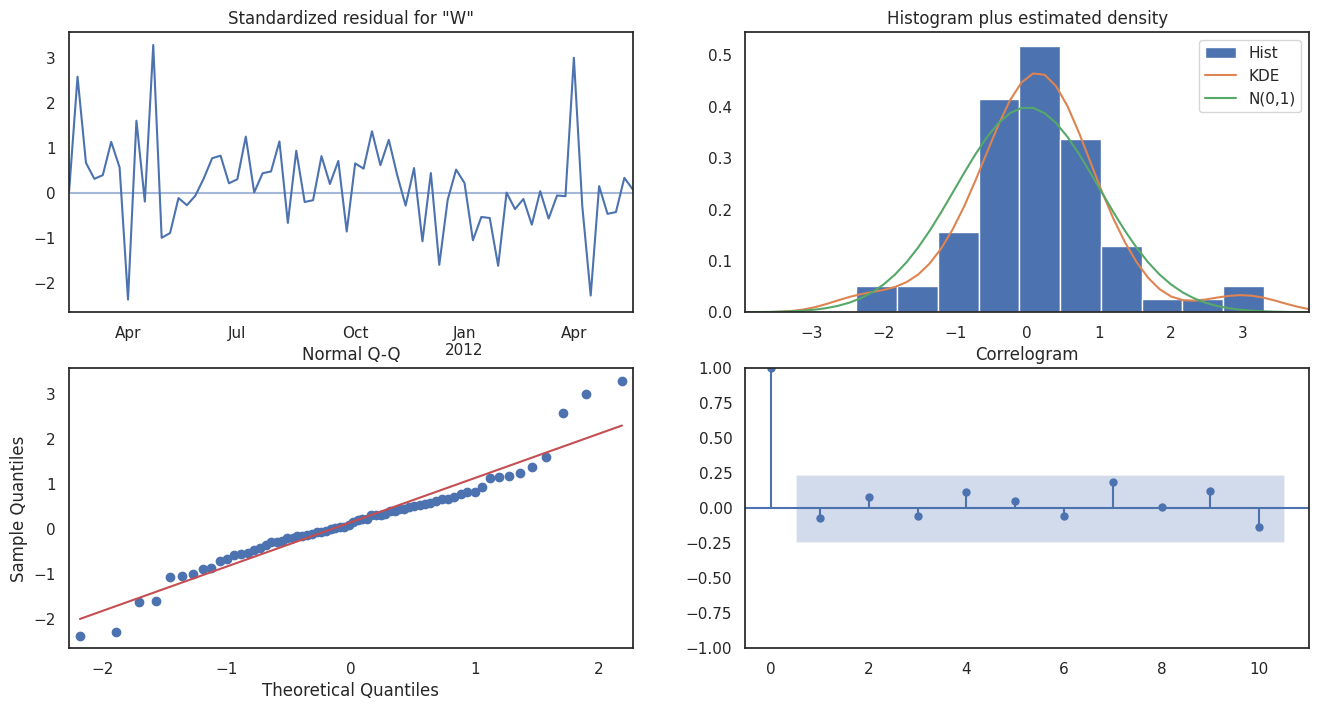

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

In [ ]:
forecast_object = results.get_forecast(steps=len(test))

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

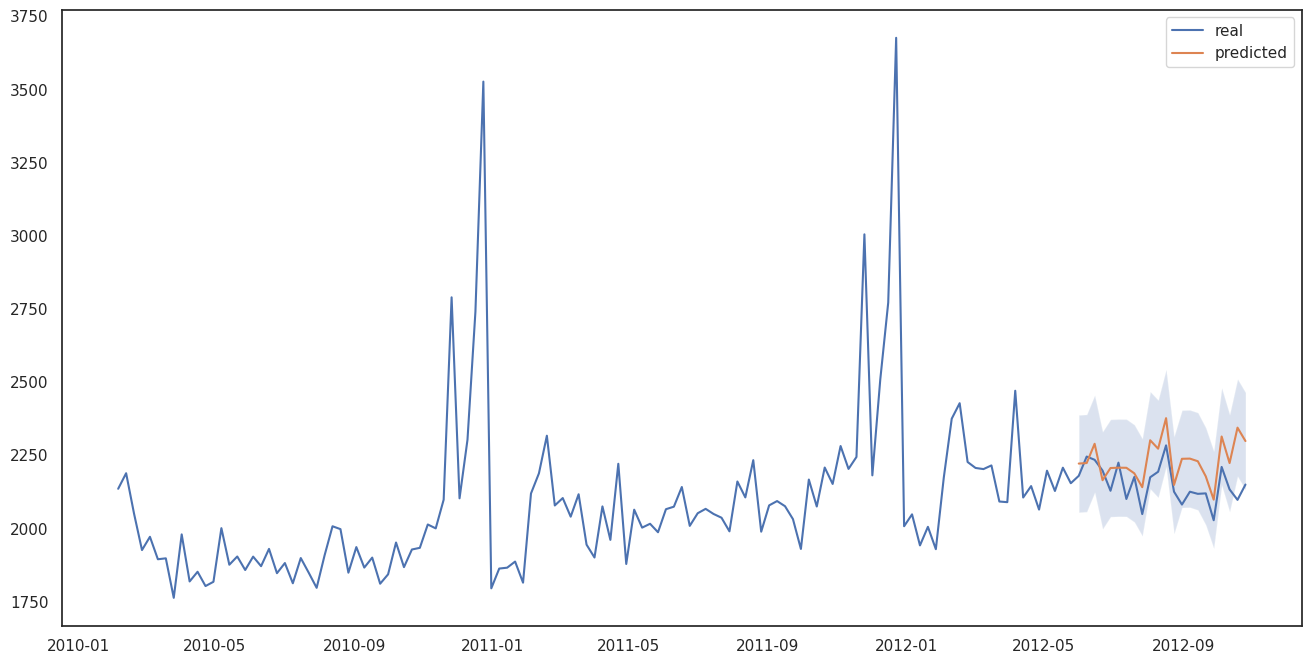

In [ ]:
plt.figure(figsize=(16,8))

# Plot past sales
plt.plot(sales4.index, sales4, label='real')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.savefig('predtest')
plt.show()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,1)(0,1,1,52) Predictions')


In [ ]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={sales4['Weekly_Sales'][i]}")

predicted=2221.321667, expected=2135.1438700000003
predicted=2223.071659, expected=2188.30739
predicted=2288.931017, expected=2049.86026
predicted=2164.394689, expected=1925.72884
predicted=2206.127283, expected=1971.05744
predicted=2207.192059, expected=1894.32409
predicted=2206.890401, expected=1897.42936
predicted=2187.914625, expected=1762.5393000000001
predicted=2140.522869, expected=1979.2471200000002
predicted=2300.992465, expected=1818.45272
predicted=2272.165765, expected=1851.5196899999999
predicted=2376.57868 , expected=1802.6779
predicted=2148.156117, expected=1817.27328
predicted=2237.597105, expected=2000.6261399999999
predicted=2238.27129 , expected=1875.59728
predicted=2229.266639, expected=1903.7526
predicted=2177.637536, expected=1857.5337
predicted=2098.00636 , expected=1903.29058
predicted=2313.819127, expected=1870.61923
predicted=2223.039647, expected=1929.7363500000001
predicted=2344.064913, expected=1846.65195
predicted=2298.288759, expected=1881.33721


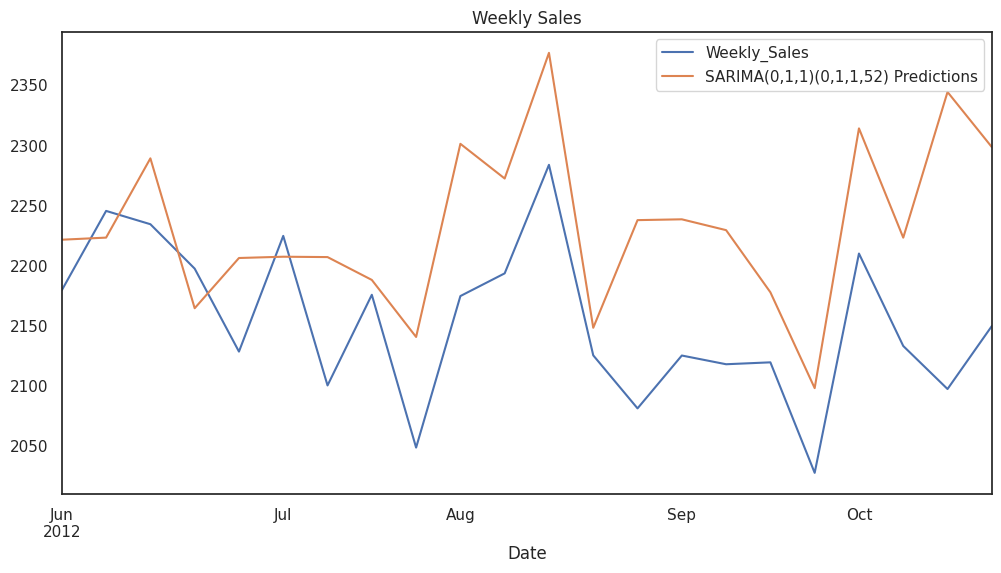

In [ ]:

# Plot predictions against known values
title = 'Weekly Sales'
ax = test['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:

r2_score(test['Weekly_Sales'], predictions)

-1.5357813009514314

In [ ]:
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Weekly_Sales'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['Weekly_Sales'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['Weekly_Sales'], predictions)
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['Weekly_Sales'])/np.abs(test['Weekly_Sales']))*100

evaluation_results

r2_score  mean_absolute_error  mean_squared_error  \
0 -1.535781            85.366327        10181.745567   

   mean_absolute_percentage_error  
0                        3.996141

Future forcast

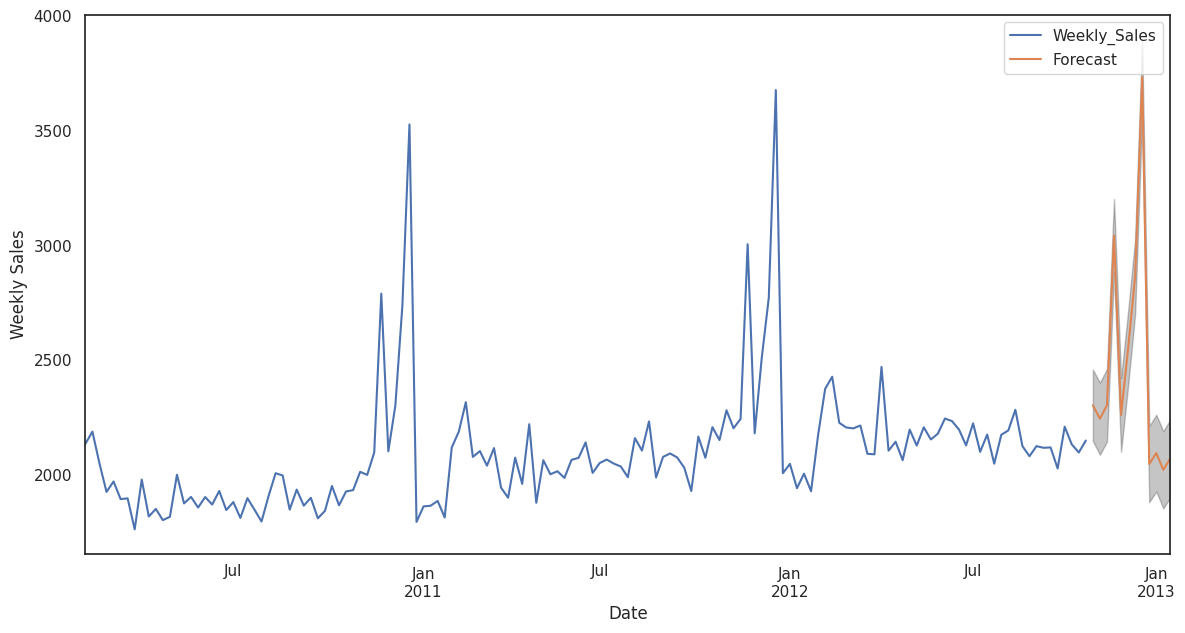

In [ ]:
# Fit SARIMAX model
model = SARIMAX(sales4, order=(0, 1, 1), seasonal_order=(0, 1, 1, 52))
results = model.fit()

# Generate forecast for the next 12 weeks
pred_f = results.get_forecast(steps=12)
pred_ci = pred_f.conf_int()

# Plotting
ax = sales4.plot(label="Weekly Sales", figsize=(14, 7))
pred_f.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
# Print dates and corresponding forecasted values
for date, forecast in zip(pred_f.predicted_mean.index, pred_f.predicted_mean):
    print(f"Date: {date}, Forecasted Value: {forecast}")


Date: 2012-11-02 00:00:00, Forecasted Value: 2303.065707316594
Date: 2012-11-09 00:00:00, Forecasted Value: 2244.659208073835
Date: 2012-11-16 00:00:00, Forecasted Value: 2303.1480759421875
Date: 2012-11-23 00:00:00, Forecasted Value: 3041.839260050758
Date: 2012-11-30 00:00:00, Forecasted Value: 2260.879435956582
Date: 2012-12-07 00:00:00, Forecasted Value: 2549.6286604130705
Date: 2012-12-14 00:00:00, Forecasted Value: 2865.2503577353214
Date: 2012-12-21 00:00:00, Forecasted Value: 3732.773530121407
Date: 2012-12-28 00:00:00, Forecasted Value: 2046.9140139493388
Date: 2013-01-04 00:00:00, Forecasted Value: 2094.725003678217
Date: 2013-01-11 00:00:00, Forecasted Value: 2021.7611856306462
Date: 2013-01-18 00:00:00, Forecasted Value: 2072.204077519708


#Machine Learning Algorithm

Data Preprocessing

In [ ]:
#df.set_index('Date',inplace = True)

In [ ]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643.69090             0        42.31       2.572   
2010-02-12      1    1641.95744             1        38.51       2.548   
2010-02-19      1    1611.96817             0        39.93       2.514   
2010-02-26      1    1409.72759             0        46.63       2.561   
2010-03-05      1    1554.80668             0        46.50       2.625   

                   CPI  Unemployment  Day  Month  Year  Week  
Date                                                          
2010-02-05  211.096358         8.106    5      2  2010     5  
2010-02-12  211.242170         8.106   12      2  2010     6  
2010-02-19  211.289143         8.106   19      2  2010     7  
2010-02-26  211.319643         8.106   26      2  2010     8  
2010-03-05  211.350143         8.106    5      3  2010     9

No negative weekly sales

In [ ]:
input_cols = ['Store', 'Holiday_Flag',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Week']
target_col = 'Weekly_Sales'


In [ ]:
inputs = df[input_cols].copy()
targets = df[target_col].copy()

In [ ]:
numeric_cols = [
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Week']
categorical_cols = [ 'Store','Holiday_Flag']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])


In [ ]:
inputs.drop(['Store', 'Holiday_Flag'], axis=1, inplace=True)


In [ ]:
inputs.head()

Temperature  Fuel_Price       CPI  Unemployment    Year     Month  \
Date                                                                            
2010-02-05     0.024405   -1.213377 -1.237768     -0.332939 -1005.0 -0.082645   
2010-02-12     0.024041   -1.219401 -1.237754     -0.332939 -1005.0 -0.082645   
2010-02-19     0.024177   -1.227935 -1.237749     -0.332939 -1005.0 -0.082645   
2010-02-26     0.024818   -1.216138 -1.237746     -0.332939 -1005.0 -0.082645   
2010-03-05     0.024806   -1.200073 -1.237743     -0.332939 -1005.0 -0.074380   

                 Day      Week  Store_1  Store_2  ...  Store_38  Store_39  \
Date                                              ...                       
2010-02-05 -0.028889 -0.018070      1.0      0.0  ...       0.0       0.0   
2010-02-12 -0.021111 -0.017686      1.0      0.0  ...       0.0       0.0   
2010-02-19 -0.013333 -0.017301      1.0      0.0  ...       0.0       0.0   
2010-02-26 -0.005556 -0.016917      1.0      0.0  ...       0.0       0.0   
2010-03-05 -0.028889 -0.016532      1.0      0.0  ...       0.0       0.0   

            Store_40  Store_41  Store_42  Store_43  Store_44  Store_45  \
Date                                                                     
2010-02-05       0.0       0.0       0.0       0.0       0.0       0.0   
2010-02-12       0.0       0.0       0.0       0.0       0.0       0.0   
2010-02-19       0.0       0.0       0.0       0.0       0.0       0.0   
2010-02-26       0.0       0.0       0.0       0.0       0.0       0.0   
2010-03-05       0.0       0.0       0.0       0.0       0.0       0.0   

            Holiday_Flag_0  Holiday_Flag_1  
Date                                        
2010-02-05             1.0             0.0  
2010-02-12             0.0             1.0  
2010-02-19             1.0             0.0  
2010-02-26             1.0             0.0  
2010-03-05             1.0             0.0  

[5 rows x 55 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data_normalized = normalization(df,num_col)
data_normalized.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1      0.397291             0     0.434149    0.050100   
2010-02-12      1      0.396811             1     0.396967    0.038076   
2010-02-19      1      0.388501             0     0.410861    0.021042   
2010-02-26      1      0.332458             0     0.476419    0.044589   
2010-03-05      1      0.372661             0     0.475147    0.076653   

                 CPI  Unemployment  Day  Month  Year  Week  
Date                                                        
2010-02-05  0.840500      0.405118    5      2  2010     5  
2010-02-12  0.841941      0.405118   12      2  2010     6  
2010-02-19  0.842405      0.405118   19      2  2010     7  
2010-02-26  0.842707      0.405118   26      2  2010     8  
2010-03-05  0.843008      0.405118    5      3  2010     9

**Correlation between features of dataset**

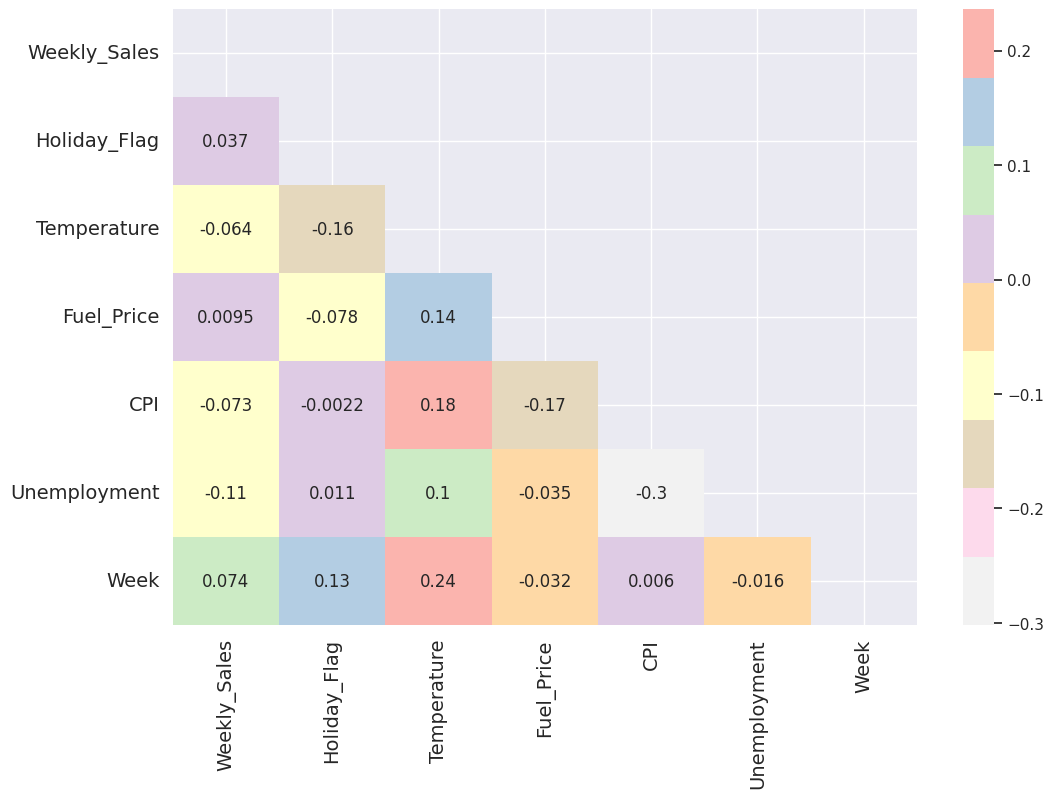

In [ ]:
#Create a dataframe for heatmap
data_heatmap_df=data_normalized.copy()

# Eliminating all the columns that are not continuous/binary  variables from the heatmap section.
data_heatmap_df.drop(['Store','Day','Month','Year'], axis=1,inplace=True)

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap='Pastel1_r')

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

# Assuming data_heatmap_df is your DataFrame
correlation_heat_map(data_heatmap_df)

In [ ]:

feature_col = data_normalized.columns.difference(['Weekly_Sales','Store'])
feature_col

Index(['CPI', 'Day', 'Fuel_Price', 'Holiday_Flag', 'Month', 'Temperature',
       'Unemployment', 'Week', 'Year'],
      dtype='object')

In [ ]:
X = inputs.copy()
Y = targets.copy()

**Data Splitted into Training, Validation, Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=50)

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  93.60547206554077


In [ ]:

y_pred = lr.predict(X_test)

In [ ]:

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))


MAE 93.48946147630149
MSE 20157.26499102227
RMSE 141.97628319906912
R2 0.936055237367069


In [ ]:

lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

Actual   Predicted
Date                              
2012-08-03  2174.51413  2112.21875
2012-02-10  1238.84456  1305.31250
2012-07-06   358.46158   282.53125
2010-08-27  1727.56542  1860.34375
2010-02-26   749.54955   877.43750
...                ...         ...
2011-11-18  1539.48370  1618.93750
2011-01-07  1153.59653  1224.53125
2010-10-22   916.52266  1060.75000
2010-10-08   480.23988   607.34375
2011-05-27   553.83404   483.53125

[1287 rows x 2 columns]

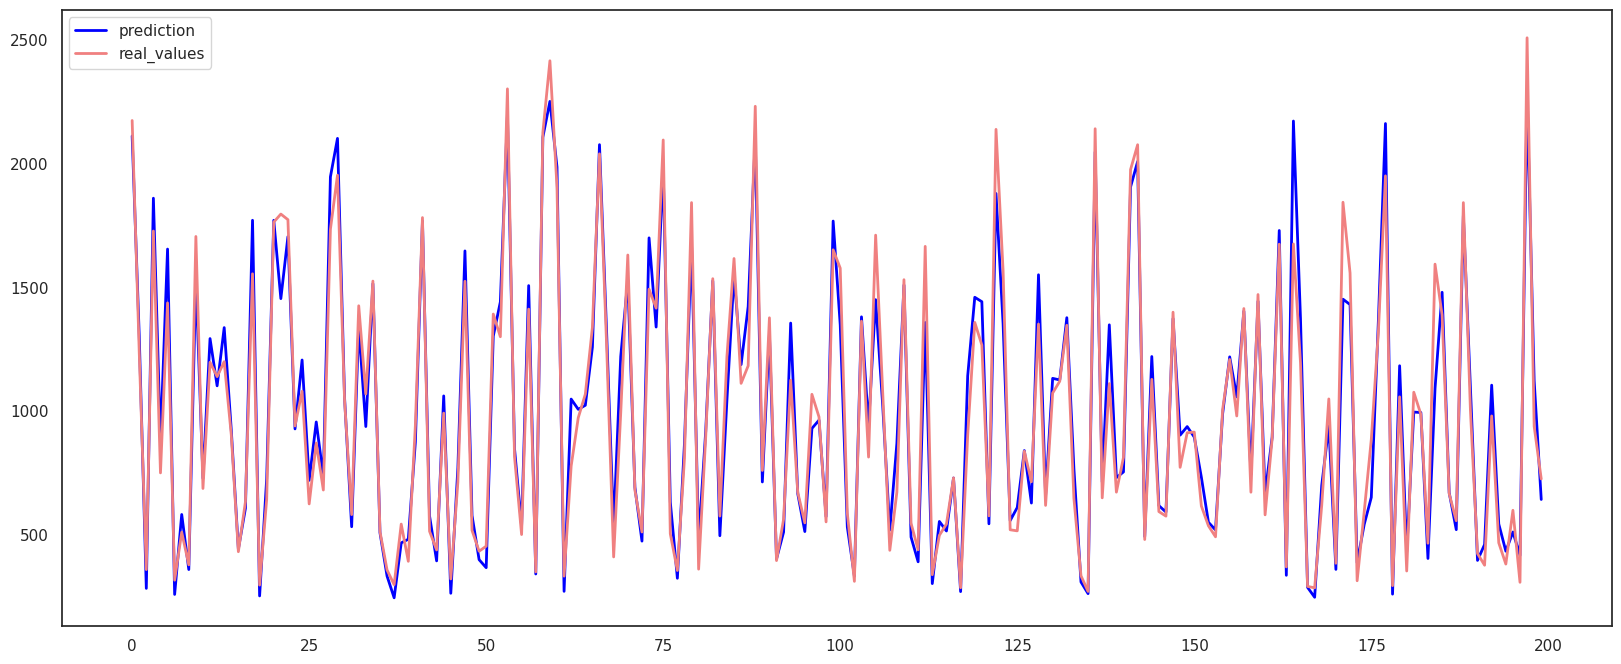

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  95.6074687508615


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 54.48794088166283
MSE 13846.435151701085
RMSE 117.67087639556819
R2 0.9561606774026994


In [ ]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

Actual    Predicted
Date                               
2012-08-03  2174.51413  2187.294846
2012-02-10  1238.84456  1240.801599
2012-07-06   358.46158   331.931497
2010-08-27  1727.56542  1847.075864
2010-02-26   749.54955   810.237487
...                ...          ...
2011-11-18  1539.48370  1657.937276
2011-01-07  1153.59653  1080.848058
2010-10-22   916.52266   917.294154
2010-10-08   480.23988   478.014198
2011-05-27   553.83404   543.740629

[1287 rows x 2 columns]

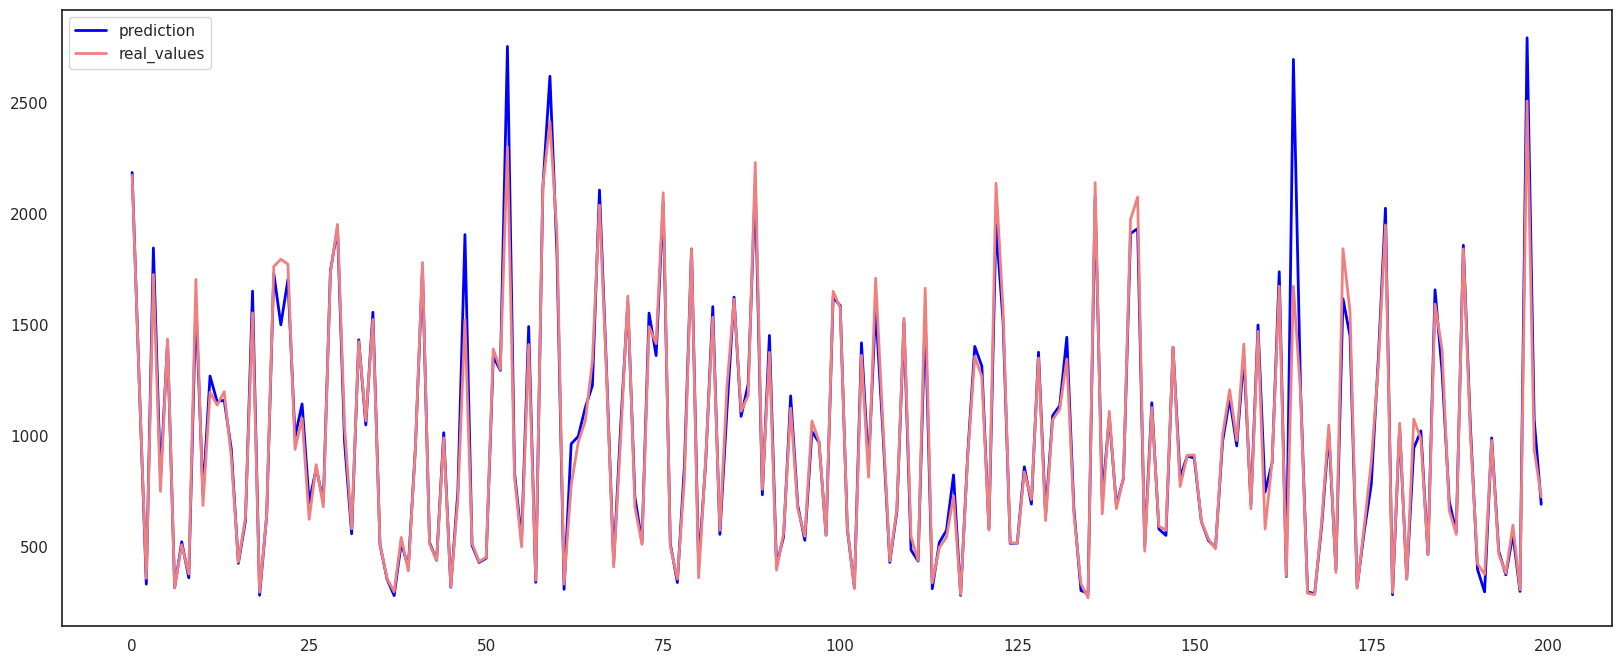

In [ ]:

plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.35255584301835


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 86.68920114996115
MSE 27259.060426966043
RMSE 165.1031811533807
R2 0.9136173775139926


In [ ]:

knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

knn_df

Actual   Predicted
Date                              
2012-08-03  2174.51413  2234.19093
2012-02-10  1238.84456  1392.14382
2012-07-06   358.46158   337.98574
2010-08-27  1727.56542  1832.66403
2010-02-26   749.54955   800.71400
...                ...         ...
2011-11-18  1539.48370  1594.93889
2011-01-07  1153.59653  1052.60916
2010-10-22   916.52266   895.06988
2010-10-08   480.23988   448.99873
2011-05-27   553.83404   532.22620

[1287 rows x 2 columns]

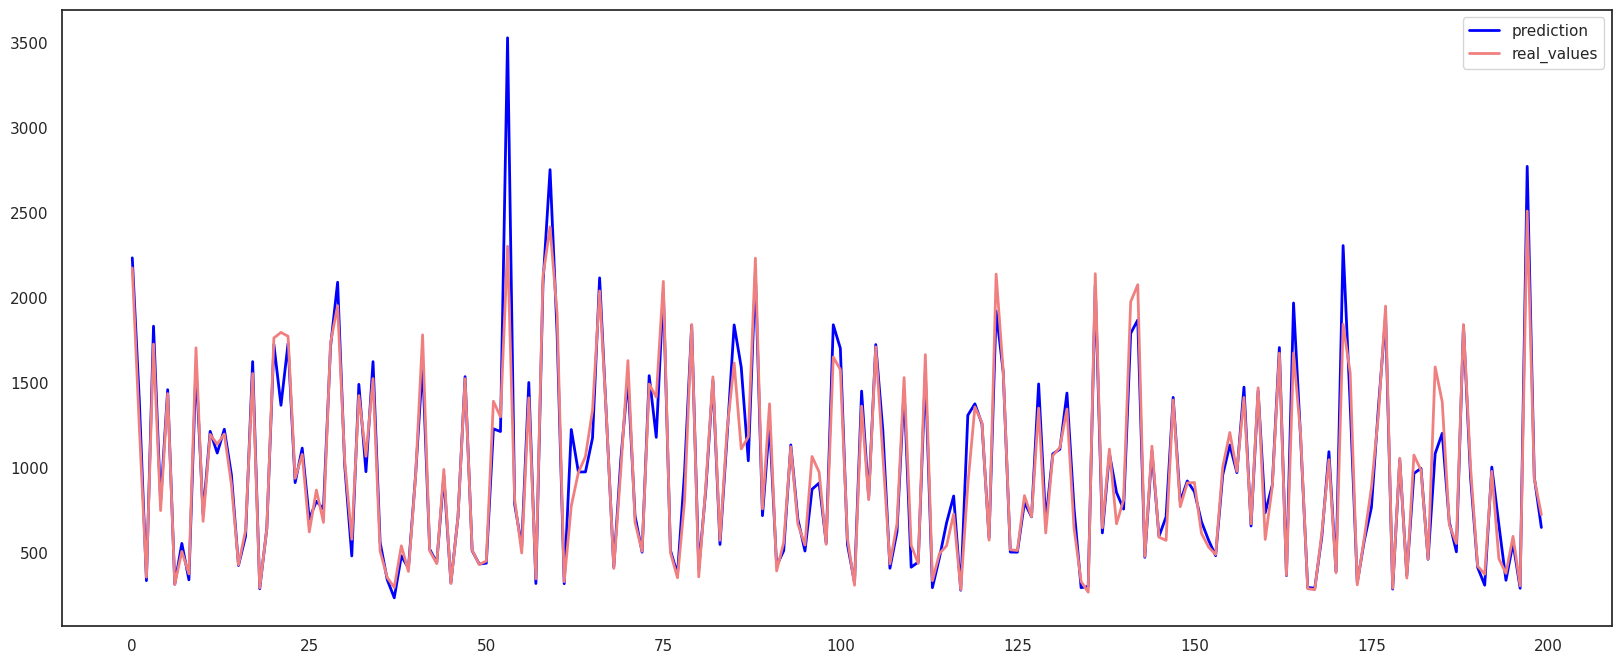

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

plt.show()

**XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)


XGBoost Regressor Accuracy -  97.5095885396584


In [ ]:
y_pred = xgbr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.10304471843593951
MSE 0.019336134723218927
RMSE 0.1390544307931931
R2 0.20127672673699426


In [ ]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df


Actual    Predicted
Date                               
2012-08-03  2174.51413  2167.182861
2012-02-10  1238.84456  1243.493042
2012-07-06   358.46158   400.318878
2010-08-27  1727.56542  1760.574585
2010-02-26   749.54955   779.699890
...                ...          ...
2011-11-18  1539.48370  1586.256104
2011-01-07  1153.59653  1084.455444
2010-10-22   916.52266   963.138794
2010-10-08   480.23988   481.382385
2011-05-27   553.83404   534.169495

[1287 rows x 2 columns]

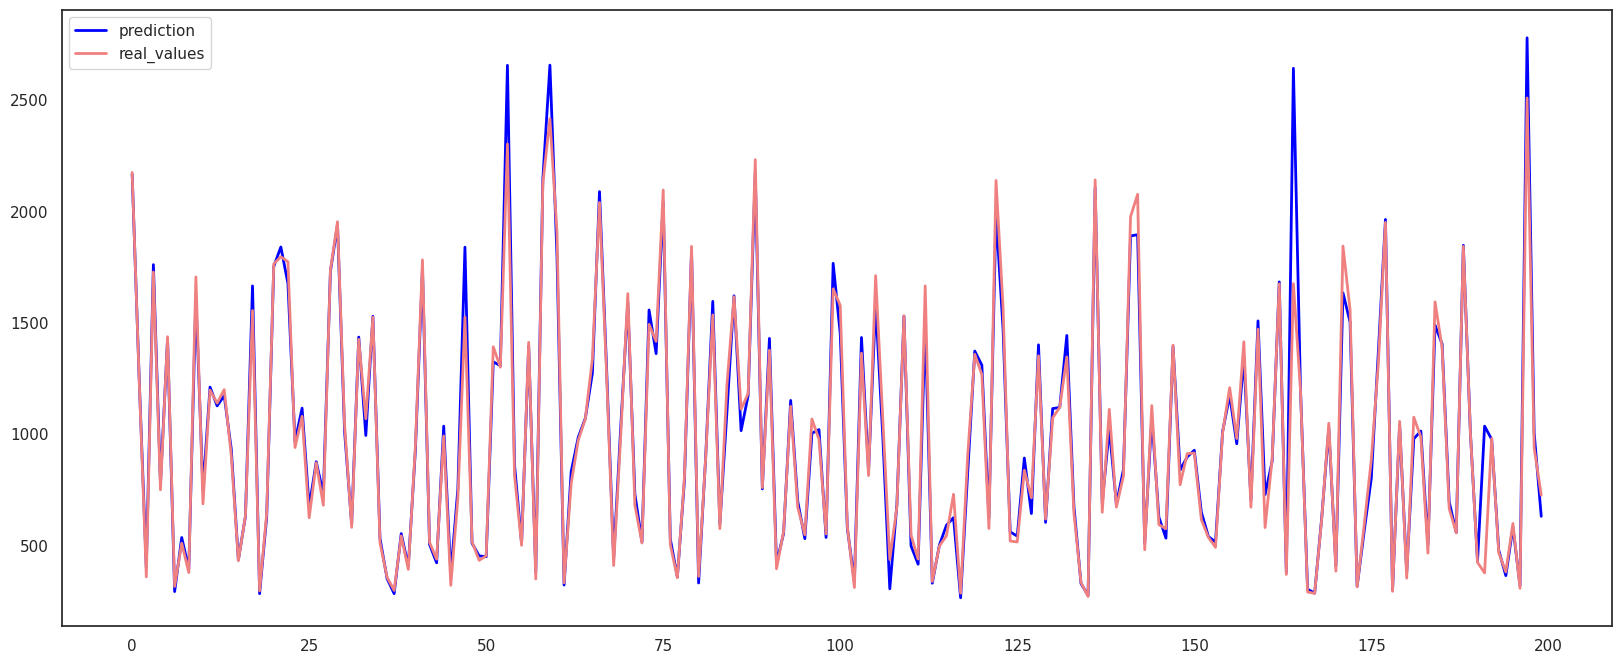

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()